# EDA

캐글에서 진행하는 LOAN DATA에 대한 EDA 이다. 

각 컬럼의 데이터 타입, 분포를 확인하겠다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/loan/Loan payments data.csv')

In [3]:
data

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [4]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


위에 표시되지 않은 컬럼들은 수치로 표현될 수 없는 값들이기 때문에 생략되었다.

예측해야하는 것은 loan_status이다.

## 메타데이터

데이터의 의미와 데이터 타입에 대해 정의하겠다.

### loan_id

In [5]:
data.Loan_ID.describe()

count             500
unique            500
top       xqd20160336
freq                1
Name: Loan_ID, dtype: object

Loan_ID는 각기 대출자 식별 ID로 500개 모두 다른 고유한 문자열이다.

### loan_status

In [6]:
data.loan_status.describe()

count         500
unique          3
top       PAIDOFF
freq          300
Name: loan_status, dtype: object

In [7]:
set(data.loan_status)

{'COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF'}

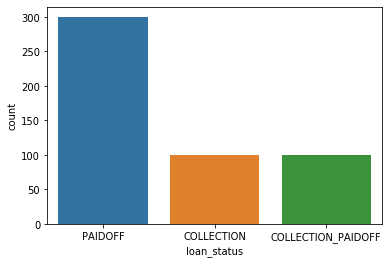

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = data, x = 'loan_status')

PAIDOFF = 제시간 안에 대출 상환

COLLECTION = 아직 상환 X

COLLECTION_PAIDOFF = 늦었지만 상환

위 세가지가 예측해야하는 타겟값이 된다. 다중분류 모델링을 해야한다.

### principal

In [9]:
data.Principal

0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
495    1000
496    1000
497     800
498    1000
499    1000
Name: Principal, Length: 500, dtype: int64

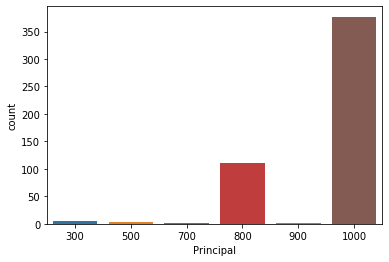

In [10]:
import seaborn as sns

sns.countplot(data = data, x = 'Principal')

초기 대출금이다. 1000이 압도적으로 높은것을 확인 할 수 있다.

### terms

In [11]:
data.terms

0      30
1      30
2      30
3      15
4      30
       ..
495    30
496    15
497    15
498    30
499    30
Name: terms, Length: 500, dtype: int64

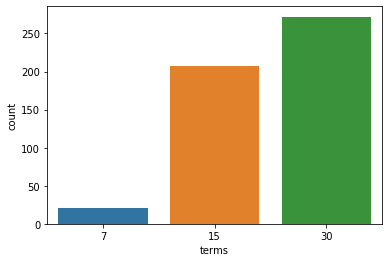

In [12]:
import seaborn as sns

sns.countplot(data = data, x = 'terms')

빚 상환 기간이다. 7, 15, 30일 총 세가지 기간으로 구성되어있다.

### effective date

In [13]:
data.effective_date

0       9/8/2016
1       9/8/2016
2       9/8/2016
3       9/8/2016
4       9/9/2016
         ...    
495    9/12/2016
496    9/12/2016
497    9/12/2016
498    9/12/2016
499    9/12/2016
Name: effective_date, Length: 500, dtype: object

대출일이다. 시작일 정도로 생각하면 될 듯 하다.

### due date

In [14]:
data.due_date

0       10/7/2016
1       10/7/2016
2       10/7/2016
3       9/22/2016
4       10/8/2016
          ...    
495    10/11/2016
496     9/26/2016
497     9/26/2016
498    11/10/2016
499    10/11/2016
Name: due_date, Length: 500, dtype: object

상환일이다. 갚아야했던 기간이라고 생각하자

### paid_off_time

In [15]:
data.paid_off_time

0       9/14/2016 19:31
1        10/7/2016 9:00
2       9/25/2016 16:58
3       9/22/2016 20:00
4       9/23/2016 21:36
             ...       
495    10/14/2016 19:08
496    10/10/2016 20:02
497     9/29/2016 11:49
498    11/11/2016 22:40
499    10/19/2016 11:58
Name: paid_off_time, Length: 500, dtype: object

실제로 갚은날이라고 생각하자. 

due_date 과 paid_off_time의 날짜가 같으면 status가 paid_off인 것을 확인할 수 있다.

### past_due_days

In [16]:
data.past_due_days

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
495     3.0
496    14.0
497     3.0
498     1.0
499     8.0
Name: past_due_days, Length: 500, dtype: float64

상환일로부터 얼마나 지체되었는지 말해주는 지표이다.

NaN값은 상환일 전에 빚을 갚은 사람들이다.

### age

In [17]:
data.age

0      45
1      50
2      33
3      27
4      28
       ..
495    28
496    26
497    30
498    38
499    28
Name: age, Length: 500, dtype: int64

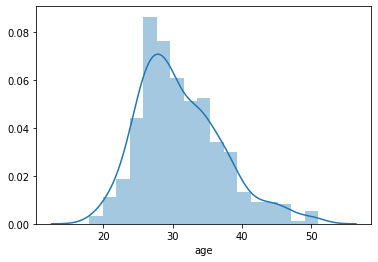

In [18]:
import seaborn as sns

sns.distplot(data.age)

연령분포이다. 20 ~ 30대가 많다는 것을 확인할 수 있다.

### education

In [19]:
data.education

0      High School or Below
1                  Bechalor
2                  Bechalor
3                   college
4                   college
               ...         
495    High School or Below
496    High School or Below
497                 college
498                 college
499    High School or Below
Name: education, Length: 500, dtype: object

In [20]:
set(data.education)

{'Bechalor', 'High School or Below', 'Master or Above', 'college'}

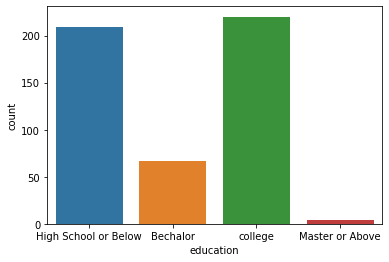

In [21]:
import seaborn as sns

sns.countplot(data.education)

상환자들의 교육 수준을 나타냈다. 

현재 소득수준을 예측할 수 있는 지표가 될수도 있을듯하다.

### gender

In [22]:
data.Gender

0        male
1      female
2      female
3        male
4      female
        ...  
495      male
496      male
497      male
498    female
499      male
Name: Gender, Length: 500, dtype: object

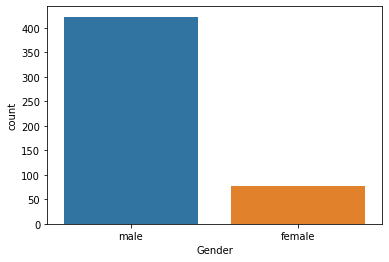

In [23]:
import seaborn as sns

sns.countplot(data.Gender)

남자가 훨씬 많은 것을 알수 있다. 

경우에 따라 다운샘플링이 필요할 듯 하다.

In [24]:
data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

데이터 타입 : 
    
- nominal(명목) : loan_id, gender
    
- ordinal(순서) : loan_status, education
        
- continuous(연속) : principal, terms, past_due_days, age
        
- date(시간) : effective_date, due_date, paid_off_time, 

loan_id는 고객을 식별하기 위한 자료였기 때문에 삭제한다.

effective_date, due_date, paid_off_time에 대한 정보는 past_due_days로 확인가능하다. 

위 4가지 컬럼을 제외하고 분석을 진행하겠다. 

In [25]:
data_1 = data.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis = 1)

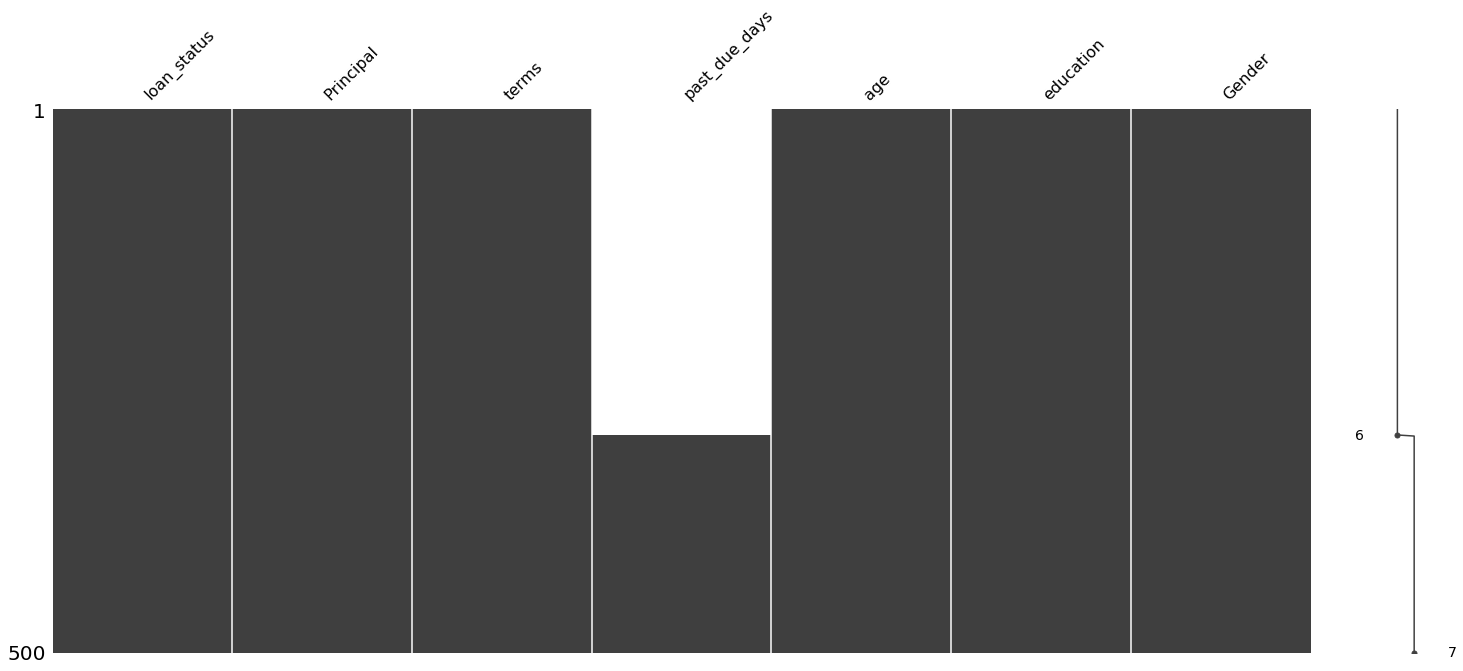

In [26]:
import missingno as msno

msno.matrix(data_1)

이때 past_due_days의 null값은 제 때 상환했다는 것이기 때문에 0으로 대체하겠다

In [27]:
data_1.past_due_days = data_1.past_due_days.fillna(0)

# 변수별로 상관관계 확인

### 0. 히트맵을 통한 대략적인 확인

In [28]:
for i in data_1.columns:
    null_ratio = data_1[i].isnull().sum() / 500
    print(null_ratio)

0.0
0.0
0.0
0.0
0.0
0.0
0.0


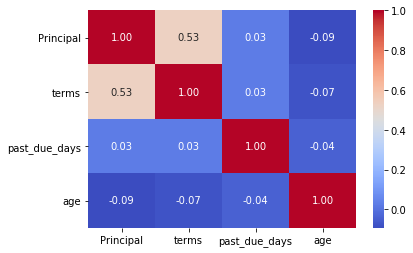

In [29]:
g = sns.heatmap(data_1.corr(),annot=True,fmt=".2f",cmap="coolwarm")

히트맵 상으로는 대출 금액과 기간의 상관관계가 매우 높았다.

각각을 확인해보자

### 1. 대출 금액과 상환사이의 상관관계 확인

대출한 금액과 상환 사이의 관계를 확인해보겠다.

In [30]:
set(data_1.Principal)

{300, 500, 700, 800, 900, 1000}

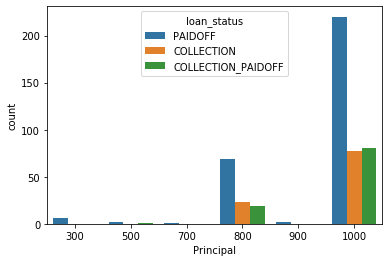

In [31]:
sns.countplot(data= data_1,x = 'Principal', hue = 'loan_status')

In [32]:
data_min_1000 = data_1[data_1.Principal != 1000]

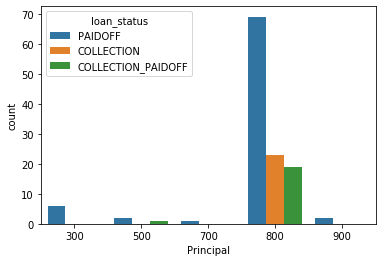

In [33]:
sns.countplot(data = data_min_1000, x = 'Principal', hue = 'loan_status')

In [34]:
ratio_800 = data_1[(data_1.loan_status == 'PAIDOFF') & (data_1.Principal == 800)].count() / data_1[data_1.Principal == 800].count()
ratio_1000 = data_1[(data_1.loan_status == 'PAIDOFF') & (data_1.Principal == 1000)].count() / data_1[data_1.Principal == 1000].count()

print('800에서의 loan_status 비율 : ', ratio_800, '1000에서의 loan_status 비율 : ',ratio_1000)

800에서의 loan_status 비율 :  loan_status      0.621622
Principal        0.621622
terms            0.621622
past_due_days    0.621622
age              0.621622
education        0.621622
Gender           0.621622
dtype: float64 1000에서의 loan_status 비율 :  loan_status      0.583554
Principal        0.583554
terms            0.583554
past_due_days    0.583554
age              0.583554
education        0.583554
Gender           0.583554
dtype: float64


근소하지만 Principal이 늘어나면서 기간안에 대출을 상환하지 못한 사람이 늘어났다.

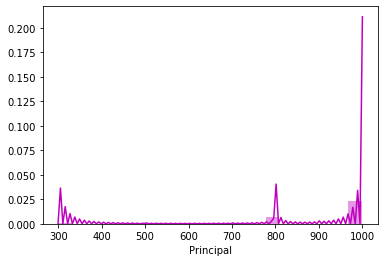

In [35]:
g = sns.distplot(data_1["Principal"],color="m", kde_kws={'bw':0.1},label="Skewness : %.2f"%(data_1["Principal"].skew()))

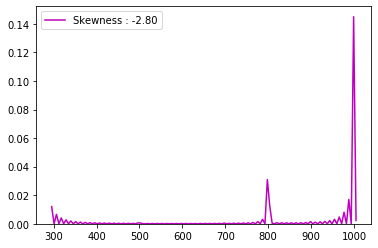

In [36]:
g = sns.kdeplot(data_1["Principal"],color="m", bw=1.5,label="Skewness : %.2f"%(data_1["Principal"].skew()))

비대칭도가 크므로 이는 후에 모델링을 할 때 문제를 일으킬 수 있다.

로그 스케일을 취해 비대칭도를 제거하자

In [37]:
data_1["Principal"] = data_1["Principal"].map(lambda i :  np.log(i) if i > 0 else 0)  #0이상의 모든 값에 log취하기

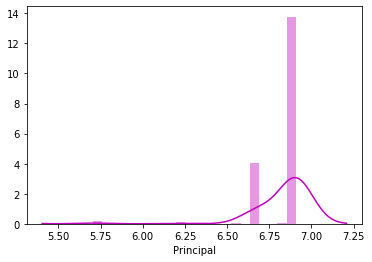

In [38]:
g = sns.distplot(data_1["Principal"],color="m", kde_kws={'bw':0.1},label="Skewness : %.2f"%(data_1["Principal"].skew()))

### 2. 대출 상환과 기간의 관계 확인

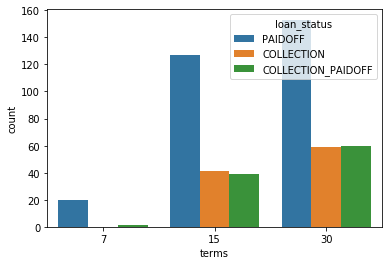

In [39]:
sns.countplot(data= data_1,x = 'terms', hue = 'loan_status')

In [40]:
len(data_1[data_1.loan_status == 'PAIDOFF'])

300

In [41]:
labels = [7,15,30]

for i in labels:
    ratio_1 = len(data_1[(data_1.loan_status == 'PAIDOFF') & (data_1.terms == i)]) / len(data_1[data_1.terms == i])
    ratio_2 = len(data_1[(data_1.loan_status == 'COLLECTION') & (data_1.terms == i)]) / len(data_1[data_1.terms == i])
    ratio_3 = len(data_1[(data_1.loan_status == 'COLLECTION_PAIDOFF') & (data_1.terms == i)]) / len(data_1[data_1.terms == i])
    
    print(i,'에서의 PAIDOFF 비율 : ', ratio_1)
    print('COLLECTION 비율 : ', ratio_2)
    print('COLLECTION_PAIDOFF 비율 : ', ratio_3)
    print('PAIDOFF와 NON PAIDOFF의 비율 : ', ratio_1 + ratio_3)

7 에서의 PAIDOFF 비율 :  0.9523809523809523
COLLECTION 비율 :  0.0
COLLECTION_PAIDOFF 비율 :  0.047619047619047616
PAIDOFF와 NON PAIDOFF의 비율 :  1.0
15 에서의 PAIDOFF 비율 :  0.6135265700483091
COLLECTION 비율 :  0.19806763285024154
COLLECTION_PAIDOFF 비율 :  0.18840579710144928
PAIDOFF와 NON PAIDOFF의 비율 :  0.8019323671497585
30 에서의 PAIDOFF 비율 :  0.5625
COLLECTION 비율 :  0.21691176470588236
COLLECTION_PAIDOFF 비율 :  0.22058823529411764
PAIDOFF와 NON PAIDOFF의 비율 :  0.7830882352941176


기간이 늘어날수록 PAIDOFF의 비율은 줄어들고, COLLECTION_PAIDOFF + PAIDOFF의 비율도 줄었다는 것을 알 수 있다.

### 3. 대출 상환과 지난 기한 사이의 관계

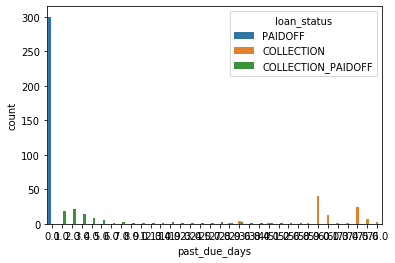

In [42]:
sns.countplot(data= data_1,x = 'past_due_days', hue = 'loan_status')

In [43]:
data_PAIDOFFX = data_1[data_1.past_due_days != 0]

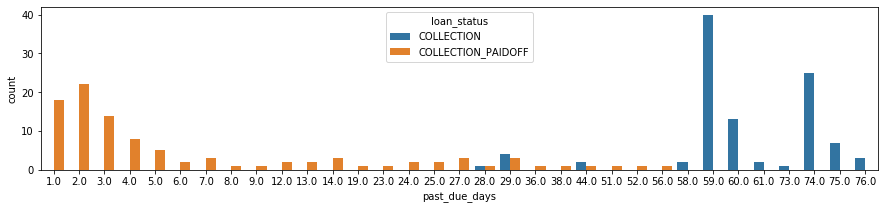

In [44]:
plt.figure(figsize=(15, 3))
sns.countplot(data= data_PAIDOFFX,x = 'past_due_days', hue = 'loan_status')

대출기한은 대략 한달 정도 된다는 것을 알 수 있다.

C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


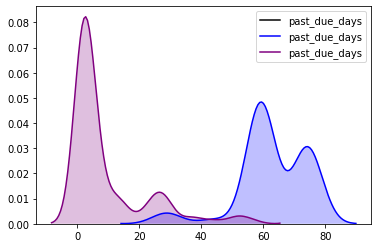

In [45]:
g = sns.kdeplot(data_1['past_due_days'][data_1['loan_status'] == 'PAIDOFF'],color="BLACK",shade=True)
g = sns.kdeplot(data_1['past_due_days'][data_1['loan_status'] == 'COLLECTION'],color="BLUE",shade=True)
g = sns.kdeplot(data_1['past_due_days'][data_1['loan_status'] == 'COLLECTION_PAIDOFF'],color="PURPLE",shade=True)

### 4. 대출 상환과 age 사이의 관계

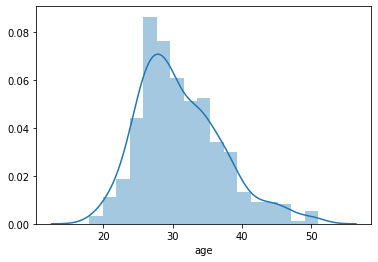

In [46]:
sns.distplot(data_1.age)

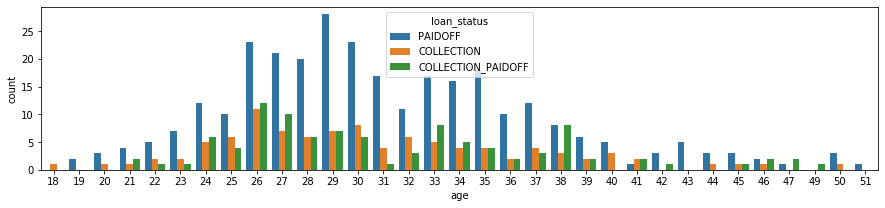

In [47]:
plt.figure(figsize=(15, 3))
sns.countplot(data= data_1,x = 'age', hue = 'loan_status')

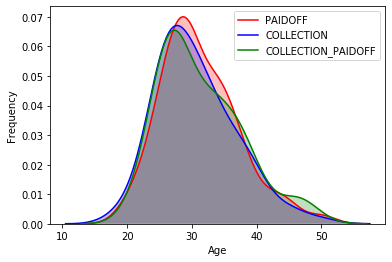

In [48]:
g = sns.kdeplot(data_1['age'][data_1['loan_status'] == 'PAIDOFF'],color="Red",shade=True)
g = sns.kdeplot(data_1['age'][data_1['loan_status'] == 'COLLECTION'],color="BLUE",shade=True)
g = sns.kdeplot(data_1['age'][data_1['loan_status'] == 'COLLECTION_PAIDOFF'],color="GREEN",shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["PAIDOFF","COLLECTION",'COLLECTION_PAIDOFF'])

### 5. 교육과 상환과의 관계

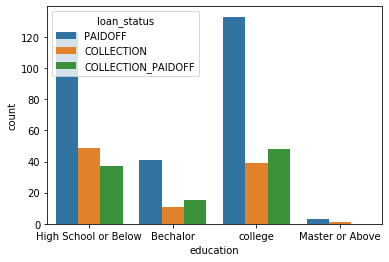

In [49]:
sns.countplot(data= data_1,x = 'education', hue = 'loan_status')

In [50]:
labels = ['High School or Below','Bechalor','college','Master or Above']

for i in labels:
    ratio_1 = len(data_1[(data_1.loan_status == 'PAIDOFF') & (data_1.education == i)]) / len(data_1[data_1.education == i])
    ratio_2 = len(data_1[(data_1.loan_status == 'COLLECTION') & (data_1.education == i)]) / len(data_1[data_1.education == i])
    ratio_3 = len(data_1[(data_1.loan_status == 'COLLECTION_PAIDOFF') & (data_1.education == i)]) / len(data_1[data_1.education == i])
    
    print(i,'에서의 PAIDOFF 비율 : ', ratio_1)
    print('COLLECTION 비율 : ', ratio_2)
    print('COLLECTION_PAIDOFF 비율 : ', ratio_3)
    print('PAIDOFF와 NON PAIDOFF의 비율 : ', ratio_1 + ratio_3)

High School or Below 에서의 PAIDOFF 비율 :  0.5885167464114832
COLLECTION 비율 :  0.23444976076555024
COLLECTION_PAIDOFF 비율 :  0.17703349282296652
PAIDOFF와 NON PAIDOFF의 비율 :  0.7655502392344498
Bechalor 에서의 PAIDOFF 비율 :  0.6119402985074627
COLLECTION 비율 :  0.16417910447761194
COLLECTION_PAIDOFF 비율 :  0.22388059701492538
PAIDOFF와 NON PAIDOFF의 비율 :  0.835820895522388
college 에서의 PAIDOFF 비율 :  0.6045454545454545
COLLECTION 비율 :  0.17727272727272728
COLLECTION_PAIDOFF 비율 :  0.21818181818181817
PAIDOFF와 NON PAIDOFF의 비율 :  0.8227272727272726
Master or Above 에서의 PAIDOFF 비율 :  0.75
COLLECTION 비율 :  0.25
COLLECTION_PAIDOFF 비율 :  0.0
PAIDOFF와 NON PAIDOFF의 비율 :  0.75


High School or Below 집단이 낮은 상환률을 보이고 있음을 확인할 수 있다.

나머지 집단은 유의미한 차이를 보이지는 않는다.

### 6. 성별과 상환과의 관계

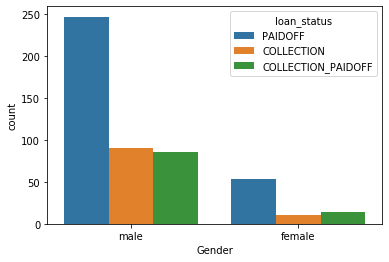

In [51]:
sns.countplot(data= data_1,x = 'Gender', hue = 'loan_status')

In [52]:
labels = ['male','female']

for i in labels:
    ratio_1 = len(data_1[(data_1.loan_status == 'PAIDOFF') & (data_1.Gender == i)]) / len(data_1[data_1.Gender == i])
    ratio_2 = len(data_1[(data_1.loan_status == 'COLLECTION') & (data_1.Gender == i)]) / len(data_1[data_1.Gender == i])
    ratio_3 = len(data_1[(data_1.loan_status == 'COLLECTION_PAIDOFF') & (data_1.Gender == i)]) / len(data_1[data_1.Gender == i])
    
    print(i,'에서의 PAIDOFF 비율 : ', ratio_1)
    print('COLLECTION 비율 : ', ratio_2)
    print('COLLECTION_PAIDOFF 비율 : ', ratio_3)
    print('PAIDOFF와 NON PAIDOFF의 비율 : ', ratio_1 + ratio_3)

male 에서의 PAIDOFF 비율 :  0.5839243498817966
COLLECTION 비율 :  0.2127659574468085
COLLECTION_PAIDOFF 비율 :  0.2033096926713948
PAIDOFF와 NON PAIDOFF의 비율 :  0.7872340425531914
female 에서의 PAIDOFF 비율 :  0.6883116883116883
COLLECTION 비율 :  0.12987012987012986
COLLECTION_PAIDOFF 비율 :  0.18181818181818182
PAIDOFF와 NON PAIDOFF의 비율 :  0.8701298701298701


남성보다 여성의 상환비율이 높은 것으로 확인된다.

# Feature Engineering

해석력을 높이기 위해 피쳐 추출이 아닌 선택 과정을 거치겠다.

컬럼 자체가 적으므로 후에 randomforest와 grid search를 통해 변수 중요도를 확인하겠다.

원래 카테고리 value인 loan_status, education, gender는 원핫 인코딩을 통해 수치화 하겠다.

In [53]:
for i in range(len(data_1.loan_status)):
    if data_1.loan_status[i] == 'PAIDOFF':
        data_1.loan_status[i] = 0
    elif data_1.loan_status[i] == 'COLLECTION_PAIDOFF':
        data_1.loan_status[i] = 1
    elif data_1.loan_status[i] == 'COLLECTION':
        data_1.loan_status[i] = 2   

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
data_1.loan_status = data_1.loan_status.astype('int')

In [55]:
data_1 = pd.get_dummies(data_1, columns = ['education'],prefix = "E")
data_1 = pd.get_dummies(data_1, columns = ['Gender'],prefix = "G")

In [56]:
data_1

,loan_status,Principal,terms,past_due_days,age,E_Bechalor,E_High School or Below,E_Master or Above,E_college,G_female,G_male
0,0,6.907755,30,0.0,45,0,1,0,0,0,1
1,0,6.907755,30,0.0,50,1,0,0,0,1,0
2,0,6.907755,30,0.0,33,1,0,0,0,1,0
3,0,6.907755,15,0.0,27,0,0,0,1,0,1
4,0,6.907755,30,0.0,28,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,1,6.907755,30,3.0,28,0,1,0,0,0,1
496,1,6.907755,15,14.0,26,0,1,0,0,0,1
497,1,6.684612,15,3.0,30,0,0,0,1,0,1
498,1,6.907755,30,1.0,38,0,0,0,1,1,0


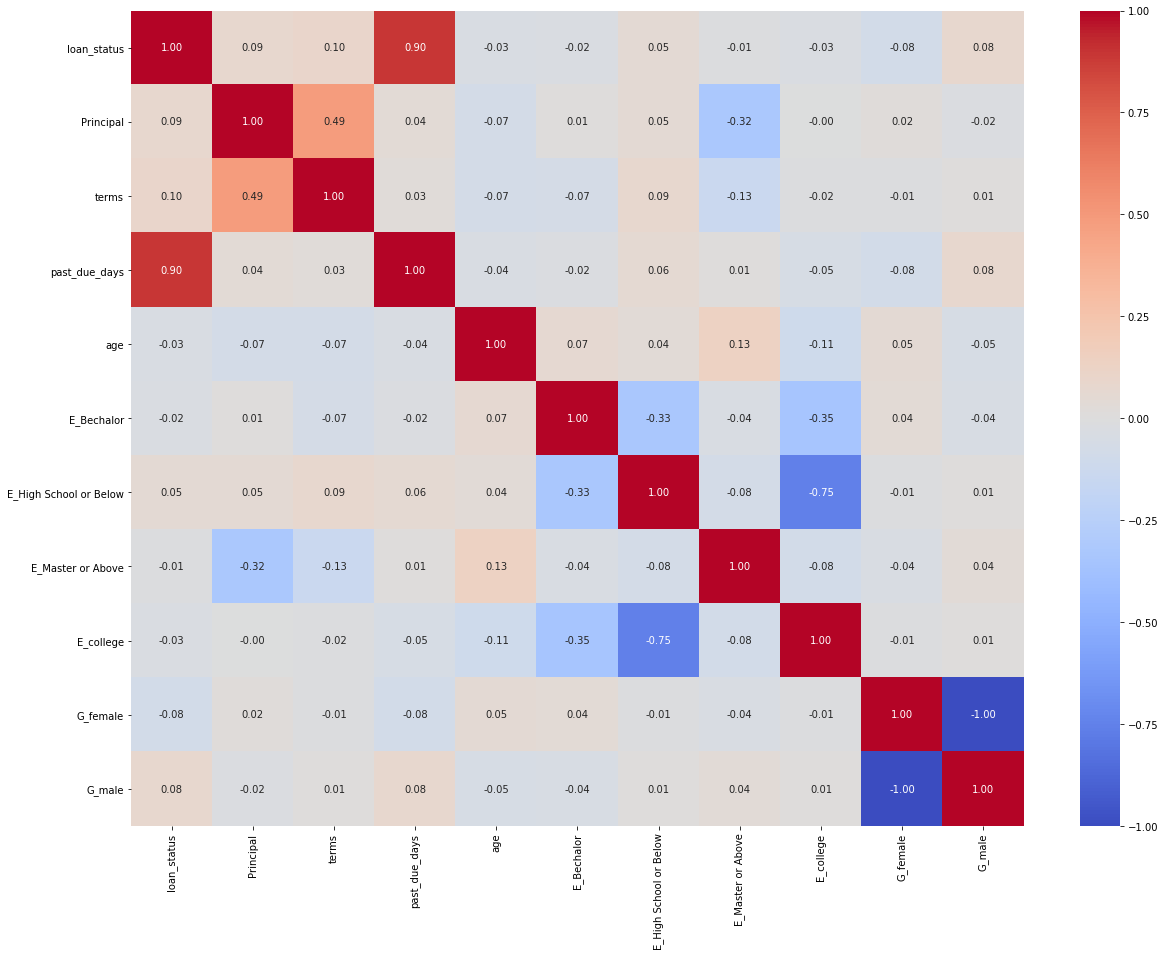

In [57]:
plt.figure(figsize = (20,15))
g = sns.heatmap(data_1.corr(),annot=True,fmt=".2f",cmap="coolwarm")

# Modeling

In [63]:
data_X = data_1.drop('loan_status',axis = 1)
data_Y = data_1['loan_status']

In [65]:
data_X

,Principal,terms,past_due_days,age,E_Bechalor,E_High School or Below,E_Master or Above,E_college,G_female,G_male
0,6.907755,30,0.0,45,0,1,0,0,0,1
1,6.907755,30,0.0,50,1,0,0,0,1,0
2,6.907755,30,0.0,33,1,0,0,0,1,0
3,6.907755,15,0.0,27,0,0,0,1,0,1
4,6.907755,30,0.0,28,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
495,6.907755,30,3.0,28,0,1,0,0,0,1
496,6.907755,15,14.0,26,0,1,0,0,0,1
497,6.684612,15,3.0,30,0,0,0,1,0,1
498,6.907755,30,1.0,38,0,0,0,1,1,0


In [66]:
data_Y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: loan_status, Length: 500, dtype: int32

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.33, random_state=777,stratify = data_Y) 

In [107]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,random_state=0)

forest.fit(X_train,Y_train)



print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,Y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,Y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.964


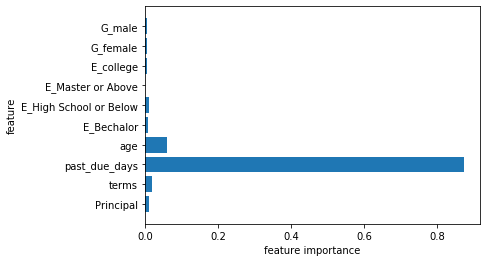

In [88]:
def plot_feature_importances_loan(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_loan(forest)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
X_scaled = robustScaler.fit_transform(X_train)

forest = RandomForestClassifier(n_estimators=100,random_state=0)

forest.fit(X_scaled,Y_train)





훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.909


왜 robustscaler를 썻는데 정확도가 떨어질까... 과적합인가? 후에 이상치 제거시에 함께 알아보자

랜덤포레스트의 피쳐 임포턴스에서는 past_due_days가 압도적으로 유의미한 피쳐라고 산출되었다.

In [109]:
# xgboost를 통한 피쳐 임포턴스

import xgboost as xgb 
from xgboost import XGBClassifier
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train,Y_train)

print("훈련 세트 정확도 : {:.3f}".format(xgb.score(X_train,Y_train)))

print("테스트 세트 정확도 : {:.3f}".format(xgb.score(X_test,Y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.970


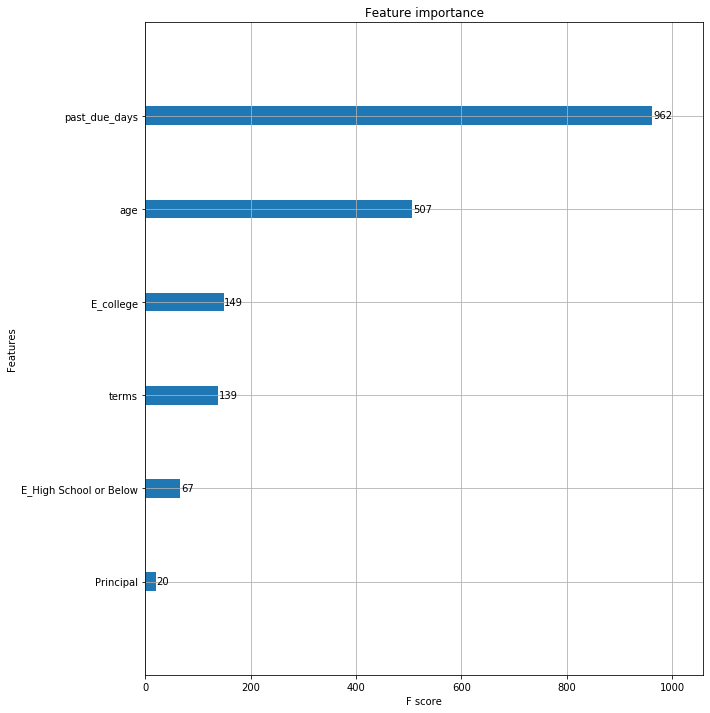

In [110]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

xgboost를 통해서 살펴본 결과 past_due_days가 가장 유의미 했지만, age 지표도 상당히 유의미하다는 사실을 알 수 있다.

의문점 : past_due_days는 loan_status를 예측할 때 존재하면 안되는 지표 아닌가..?

### 여러 모델의 모델링을 한꺼번에 진행

#### Simple modeling

SVC

Decision Tree

XGboost

AdaBoost

Random Forest

Extra Trees

Gradient Boosting

Multiple layer perceprton (neural network)

KNN

Logistic regression

Linear Discriminant Analysis

위 12개의 모델들의 정확도를 KFold Cross Validation을 통해서 평균낼 것이다,

In [114]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier

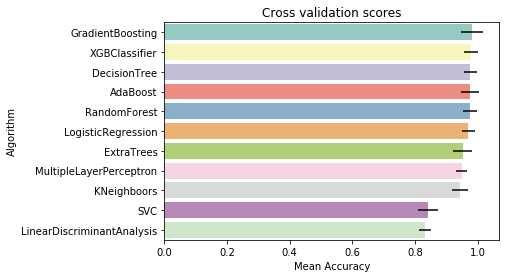

In [117]:
kfold = StratifiedKFold(n_splits = 7)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state = random_state, learning_rate = 0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))  #extratreesclassifier : 더욱 랜덤한 randomforest
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y = Y_train, scoring = 'accuracy', cv = kfold,n_jobs = -1 ))  #cross_val_score : 원하는 평가지표 평가 가능
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors':cv_std,'Algorithm':["SVC","DecisionTree", "AdaBoost","RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'XGBClassifier']}).sort_values(by = 'CrossValMeans',ascending = False)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette='Set3',orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

In [119]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
5,0.981953,0.021032,GradientBoosting
10,0.978977,0.019700,XGBClassifier
1,0.976001,0.020978,DecisionTree
2,0.976001,0.020978,AdaBoost
3,0.976001,0.028498,RandomForest
8,0.970048,0.024799,LogisticRegression
4,0.952128,0.021888,ExtraTrees
6,0.949215,0.029242,MultipleLayerPerceptron
7,0.943326,0.018246,KNeighboors
0,0.841945,0.036236,SVC


상위 4개의 모델을 grid_search를 통해 hyper-parameter 튜닝을 하고 ensemble 해주겠다.

In [122]:
# GradientBoosting

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ['deviance'],'n_estimators' : [100,200,300], 'learning_rate' : [0.1,0.05,0.01],'max_depth':[4,8],'min_samples_leaf': [100,150],'max_features':[0.3,0.1]}
gsGBC= GridSearchCV(GBC,param_grid = gb_param_grid,cv=kfold,scoring='accuracy',n_jobs=-1,verbose=1)
gsGBC.fit(X_train,Y_train)

print('final params', gsGBC.best_params_)   # 최적의 파라미터 값 출력
print('best score', gsGBC.best_score_)      # 최고의 점수


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   45.3s


final params {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.1, 'min_samples_leaf': 100, 'n_estimators': 100}
best score 0.8389690982776089


[Parallel(n_jobs=4)]: Done 504 out of 504 | elapsed:   53.4s finished


In [123]:
# XGBClassifier
XGB = XGBClassifier()
xb_param_grid = {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']}

xbXGB = GridSearchCV(XGB, param_grid = xb_param_grid, cv = kfold, scoring = 'accuracy', n_jobs = -1, verbose = 1 )

xbXGB.fit(X_train,Y_train)

print('final params', xbXGB.best_params_)   # 최적의 파라미터 값 출력
print('best score', xbXGB.best_score_)      # 최고의 점수

Fitting 7 folds for each of 288 candidates, totalling 2016 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2016 out of 2016 | elapsed:  1.3min finished


final params {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}
best score 0.9849924012158054
